# 1. Import Data



In [1]:
#Import Dependencies 
from nilearn import plotting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import image
import nibabel as nib
import os
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation, load_conte69
from brainspace.gradient import GradientMaps
labeling = load_parcellation('schaefer', scale=100, join=True)
# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# Load Schefer atlas for parcellation # 100 ROI, 7Networks
from nilearn import plotting, datasets
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7,resolution_mm=2)
atlas_filename = atlas_file.maps
labels = atlas_file.labels

In [3]:
# Import Masker 
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)
masker

NiftiLabelsMasker(labels_img='/Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
                  memory='nilearn_cache', standardize=True, verbose=5)

In [4]:
atlas_file = nib.load('/Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz')

with open('/Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order.txt', 'r') as f:
    labels = f.read().split('\n')
masker = NiftiLabelsMasker(labels_img=atlas_file, standardize=True, verbose=1,
                           memory="nilearn_cache", memory_level=2)
labels = [x.split('\t')[1][10:] for x in labels]


# 2. LSD Timeseries extraction

In [4]:
import os
data_path =  '/Users/mioulin/Desktop/data/lsd/lsd_scans'
subjects = ['001', '002', '004', '006', '009', '010', '011', '013', '017', '018', '019', '020']

sessions = ['drug','pcb']

In [150]:
task = 'rest'
runs = ['01','02','03']
suffix = 'nii.gz'

timeseries_all = dict()

#Iterationg over sessions
for ses in sessions:
    
    #Iterating over subjects
    for i, subj in enumerate(subjects):
        
        #Iterating over runs
        for k, run in enumerate(runs):
            file_path = os.path.join(data_path, f'sub-{subj}', f'ses-{ses}', 'func', f'sub-{subj}_ses-{ses}_task-{task}_run-{run}_bold.{suffix}')
            timeseries_all[run,ses,subj] =  masker.fit_transform(file_path, confounds=None)

[NiftiLabelsMasker.fit_transform] loading data from /Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz
[Memory]9942.9s, 165.7min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz
[Memory]9945.2s, 165.8min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz
[Memory]9947.9s, 165.8min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/mioulin/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Ne

In [153]:
import pickle

# Save the dictionary as a binary file using pickle
with open('timeseries_all.pkl', 'wb') as f:
    pickle.dump(timeseries_all, f)

In [39]:
import pickle
with open('timeseries_all.pkl', 'rb') as f:
    back = pickle.load(f)
    
back

{('01',
  'LSD',
  '001'): array([[ 0.55105025,  0.5591349 , -0.38001975, ...,  0.71009785,
          0.3071096 ,  0.73192096],
        [ 0.5633694 ,  0.6090556 , -0.37742892, ...,  0.7391166 ,
          0.39906853,  0.80617875],
        [ 0.57568854,  0.81089103, -0.19144408, ...,  1.1627618 ,
          0.5838746 ,  0.8677301 ],
        ...,
        [-0.9159027 ,  1.1626049 ,  0.48804826, ...,  1.0458249 ,
          2.1202736 ,  1.8447633 ],
        [-0.44321722,  1.0990695 , -0.1546635 , ...,  1.0143639 ,
          2.2910914 ,  2.0159593 ],
        [ 0.15955168,  0.58060426, -0.59755725, ...,  0.9485689 ,
          1.7926999 ,  1.7858763 ]], dtype=float32),
 ('02',
  'LSD',
  '001'): array([[ 0.06775026,  0.63120687,  0.4121453 , ...,  0.02160084,
         -0.8816158 , -0.6491314 ],
        [ 0.05694499,  0.6778174 ,  0.4320096 , ...,  0.08438911,
         -0.8345853 , -0.6161771 ],
        [ 0.8837962 ,  0.87774086,  0.7067907 , ..., -0.20475647,
         -0.7696089 , -0.60029846],


In [40]:
timeseries_all = back


In [41]:
ts_lsd = {}

# Iterate over the dictionary items and separate the keys
for key, value in timeseries_all.items():
    key1, key2, key3 = key
    if key1 not in ts_lsd:
        ts_lsd[key1] = {}
    if key2 not in ts_lsd[key1]:
        ts_lsd[key1][key2] = {}
    ts_lsd[key1][key2][key3] = value

# Print the nested dictionary
ts_lsd

{'01': {'LSD': {'001': array([[ 0.55105025,  0.5591349 , -0.38001975, ...,  0.71009785,
            0.3071096 ,  0.73192096],
          [ 0.5633694 ,  0.6090556 , -0.37742892, ...,  0.7391166 ,
            0.39906853,  0.80617875],
          [ 0.57568854,  0.81089103, -0.19144408, ...,  1.1627618 ,
            0.5838746 ,  0.8677301 ],
          ...,
          [-0.9159027 ,  1.1626049 ,  0.48804826, ...,  1.0458249 ,
            2.1202736 ,  1.8447633 ],
          [-0.44321722,  1.0990695 , -0.1546635 , ...,  1.0143639 ,
            2.2910914 ,  2.0159593 ],
          [ 0.15955168,  0.58060426, -0.59755725, ...,  0.9485689 ,
            1.7926999 ,  1.7858763 ]], dtype=float32),
   '002': array([[-1.5423176 ,  0.41512075, -0.303112  , ..., -1.0999124 ,
           -0.5420789 ,  0.6607987 ],
          [-1.6065009 ,  0.41082525, -0.34717456, ..., -1.1202035 ,
           -0.56779146,  0.6579216 ],
          [-1.0433027 ,  0.90366787, -0.4411247 , ..., -0.75808436,
           -1.3342313 ,  

# 3. Import Gradient 

In [42]:
# Load hcp functional connectivitty from brainspace toolbox: 
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69

# First load mean connectivity matrix and Schaefer parcellation
conn_matrix = load_group_fc('schaefer', scale=100)
labeling = load_parcellation('schaefer', scale=100, join=True)
from brainspace.gradient import GradientMaps

# Ask for one fc hcp grad
gm = GradientMaps(n_components=1, random_state=0)
gm.fit(conn_matrix)
grad_hcp = gm.gradients_


In [43]:
def vcorrelate(X,y):
    
    #Create input for vector
    
    N = X.shape[0]
    k = y.shape[0]
    r = np.zeros((N,k))
    
    # output
    for j in range(k):
        for i in range(N):
            r[i,j] = np.corrcoef(X[i,:], y[j])[0,1]
    return r

In [44]:
b.shape

(1, 100)

In [45]:
import numpy as np

corr_results_lsd = {}
b = grad_hcp.T

for rest, states in ts_lsd.items():
    corr_results_lsd[rest] = {}
    for state, subjects in states.items():
        corr_results_lsd[rest][state] = {}
        for subject, series in subjects.items():
            X = np.array(series)  # Convert the series data to a NumPy array
            corr_results_lsd[rest][state][subject] = vcorrelate(X, b)

In [46]:
corr_results_lsd

{'01': {'LSD': {'001': array([[-2.15674221e-01],
          [-1.92231603e-01],
          [-1.38576005e-01],
          [-1.03021190e-01],
          [-7.62977738e-02],
          [-1.52971143e-02],
          [ 3.75143925e-02],
          [ 4.70854325e-02],
          [ 8.59825193e-03],
          [-5.71320784e-02],
          [-9.50333900e-02],
          [-5.62298439e-02],
          [ 2.49286416e-02],
          [ 9.34572981e-02],
          [ 1.16858787e-01],
          [ 1.12056012e-01],
          [ 1.09030895e-01],
          [ 1.49040379e-01],
          [ 2.17678737e-01],
          [ 2.80194445e-01],
          [ 2.83599450e-01],
          [ 1.71679746e-01],
          [-5.82575554e-03],
          [-1.36521212e-01],
          [-1.98755852e-01],
          [-1.74564042e-01],
          [-1.01891577e-01],
          [-6.47492654e-02],
          [-8.37333951e-02],
          [-1.12431934e-01],
          [-7.84656207e-02],
          [ 3.43748182e-02],
          [ 1.54634807e-01],
          [ 2.17166609e

In [47]:
corr_rest1_grad1 = corr_results_lsd['01']
corr_rest2_grad1 = corr_results_lsd['02']
corr_rest3_grad1 = corr_results_lsd['03']

In [53]:
import pickle

# Save the dictionary as a binary file using pickle
with open('corr_rest1_grad1.pkl', 'wb') as f:
    pickle.dump(corr_rest1_grad1, f)
with open('corr_rest2_grad1.pkl', 'wb') as f:
    pickle.dump(corr_rest1_grad1, f)
with open('corr_rest3_grad1.pkl', 'wb') as f:
    pickle.dump(corr_rest3_grad1, f)


In [55]:
corr_rest1.keys()

dict_keys(['LSD', 'PLCB'])

In [78]:

import os 
 

with open ('/Users/mioulin/corr_rest1_grad1.pkl', 'rb') as handle:
    corr_rest1_grad1 = pickle.load(handle)
with open ('/Users/mioulin/corr_rest2_grad1.pkl', 'rb') as handle:
    corr_rest2_grad1 = pickle.load(handle)
with open ('/Users/mioulin/corr_rest3_grad1.pkl', 'rb') as handle:
    corr_rest3_grad1 = pickle.load(handle)

In [79]:
corr_rest1_grad1["pcb"] = corr_rest1_grad1.pop("PLCB")
corr_rest1_grad1["drug"] = corr_rest1_grad1.pop("LSD")
corr_rest2_grad1["drug"] = corr_rest2_grad1.pop("LSD")
corr_rest2_grad1["pcb"] = corr_rest2_grad1.pop("PLCB")
corr_rest3_grad1["drug"] = corr_rest3_grad1.pop("LSD")
corr_rest3_grad1["pcb"] = corr_rest3_grad1.pop("PLCB")




In [80]:
# Different way of results 

import numpy as np


dicts = [corr_rest2_grad1, corr_rest2_grad1, corr_rest3_grad1]

# List of all scan names
session = ['lsd1', 'lsd2', 'lsd3']

# Initialize the result dictionary
results = {'lsd1': {'drug': {}, 'pcb': {}}, 'lsd2': {'drug': {}, 'pcb': {}}, 'lsd3': {'drug': {}, 'pcb': {}}}

# Apply the code to each array in each dictionary
for drug in ['drug', 'pcb']:
    for i, d in enumerate(dicts):
        for subject, data in d[drug].items():
            # Calculate derivative
            ddt = np.diff(data, axis=0)

            # Remove first timepoint of data
            data = data[1:]

            # Concatenate data and derivative
            data = np.hstack((data, ddt))

            # Split data
            half = len(data) // 2
            data_1 = data[:half]
            data_2 = data[half:]

            # Calculate Euclidean distances between all points in data_1 and data_2
            euc = np.sqrt(np.sum((data_1[:, np.newaxis] - data_2)**2, axis=2))

            # Find where the minimum distance is
            T1, T2 = np.unravel_index(np.argmin(euc[:-2], axis=None), euc.shape)

            # Number of time points to use for Lyapunov exponent
            tLya = 40

            # Cut the split data to relevant window, starting at min. dist
            data_1 = data_1[T1:T1+tLya].T
            data_2 = data_2[T2:T2+tLya].T

            # Initial distance
            D_init = np.sqrt(np.sum((data_1[:, 0] - data_2[:, 0])**2))

            # Final distance
            D_final = np.sqrt(np.sum((data_1[:, 1] - data_2[:, 1])**2))

            # Calculate Lyapunov exponent
            Lyapunov = np.log(D_final / D_init) / tLya

            # Store the result in the dictionary
            results[session[i]][drug][subject] = Lyapunov

print(results)

{'lsd1': {'drug': {'001': 0.05330125238092527, '002': 0.06006935479246681, '004': 0.11436131502781674, '006': 0.10431565683550803, '009': 0.05315226410815793, '010': 0.13236129984356215, '011': 0.11623119229389119, '013': 0.08142667559314327, '017': 0.11020451855562771, '018': 0.05784401712652306, '019': 0.07970882497394526, '020': 0.08188464952483593}, 'pcb': {'001': 0.037506708049212675, '002': 0.044337712595860834, '004': 0.08573106724492072, '006': 0.1107314592905817, '009': 0.11408142283218567, '010': 0.11789761067467283, '011': 0.12796679012893167, '013': 0.09975312386248429, '017': 0.06444891268169986, '018': 0.07789263890852167, '019': 0.09658809367836264, '020': 0.07633522723486089}}, 'lsd2': {'drug': {'001': 0.05330125238092527, '002': 0.06006935479246681, '004': 0.11436131502781674, '006': 0.10431565683550803, '009': 0.05315226410815793, '010': 0.13236129984356215, '011': 0.11623119229389119, '013': 0.08142667559314327, '017': 0.11020451855562771, '018': 0.05784401712652306,

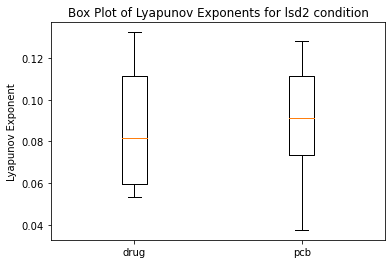

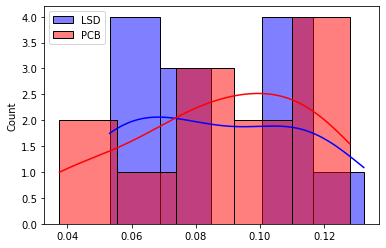

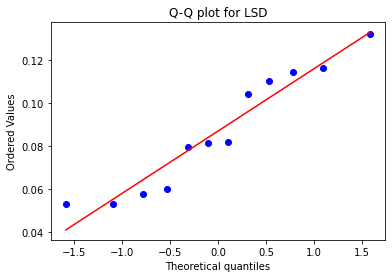

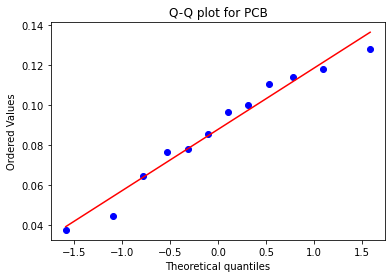

LSD data is normally distributed.
PCB data is normally distributed.
Paired t-test:
t-statistic: -0.08703526383831856
p-value: 0.9322076410106994

Wilcoxon signed-rank test:
w-statistic: 37.0
p-value: 0.90966796875


In [81]:
# LSD Music 

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd2']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd2']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd2']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd2 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")
# Perform a paired t-test
t_stat, p_val = stats.ttest_rel(lyapunov_exponents_lsd, lyapunov_exponents_pcb)
print(f"Paired t-test:\nt-statistic: {t_stat}\np-value: {p_val}")

# Perform a Wilcoxon signed-rank test
w_stat, p_val = stats.wilcoxon(lyapunov_exponents_lsd, lyapunov_exponents_pcb)
print(f"\nWilcoxon signed-rank test:\nw-statistic: {w_stat}\np-value: {p_val}")

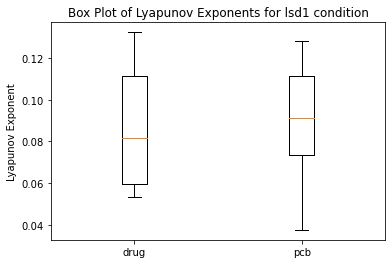

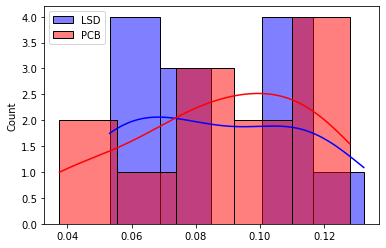

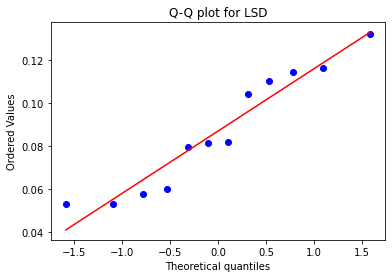

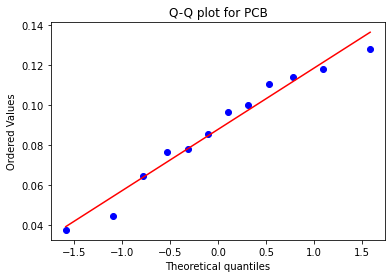

LSD data is normally distributed.
PCB data is normally distributed.


In [83]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd1']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd1']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd1']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd1 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")



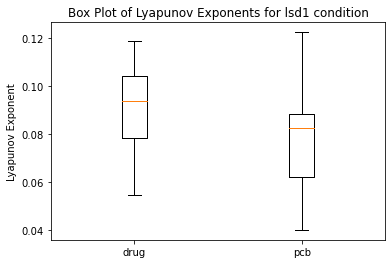

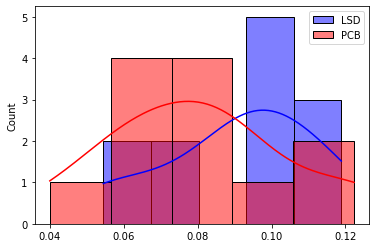

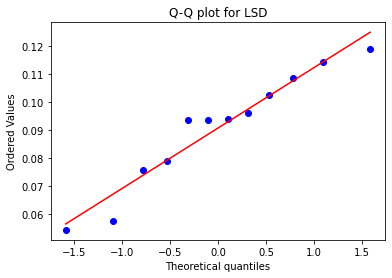

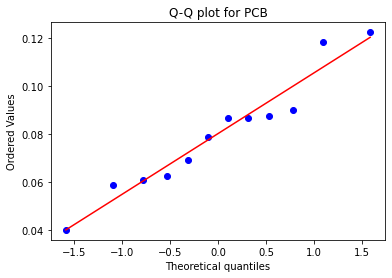

LSD data is normally distributed.
PCB data is normally distributed.


In [84]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd3']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd3']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd3']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd1 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")




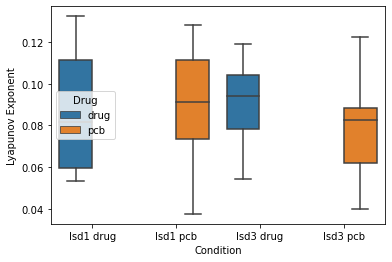

In [85]:
# Lyapunov for rest lsd no music 
import seaborn as sns
import pandas as pd


sessions = ['lsd1', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

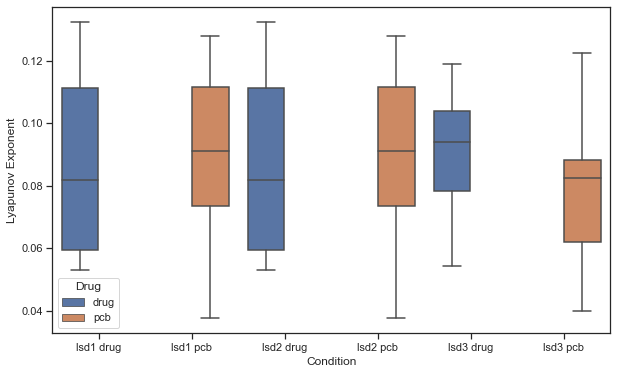

In [86]:
# Lyapunov for rest lsd and dmt  - no music 
import seaborn as sns
import pandas as pd


sessions = ['lsd1', 'lsd2', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

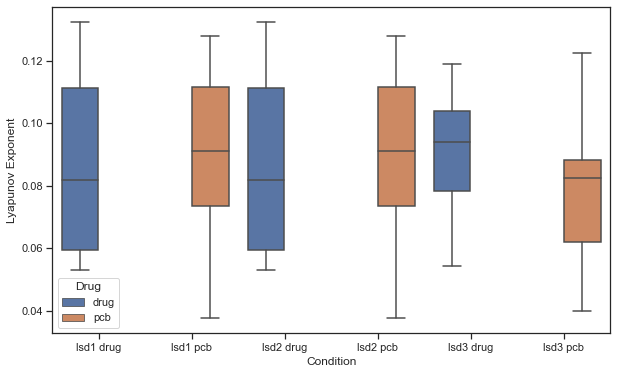

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('Lyapunov Exponent')
No. Observations: 72      Method:             REML                  
No. Groups:       12      Scale:              0.0004                
Min. group size:  6       Log-Likelihood:     161.3683              
Max. group size:  6       Converged:          Yes                   
Mean group size:  6.0                                               
----------------------------------------------------------------------
                  Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Intercept          0.088      0.006   15.037   0.000    0.077    0.100
Drug[T.pcb]       -0.003      0.005   -0.651   0.515   -0.012    0.006
Group Var          0.000      0.008                                   



/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [87]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

sessions = ['lsd1', 'lsd2', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"])
mdf = md.fit()
print(mdf.summary())




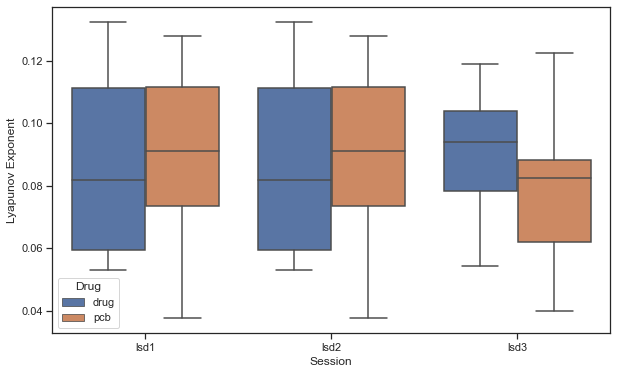

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                     Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Q('Lyapunov Exponent')
No. Observations:     72          Method:                 REML                  
No. Groups:           12          Scale:                  0.0003                
Min. group size:      6           Log-Likelihood:         165.8411              
Max. group size:      6           Converged:              No                    
Mean group size:      6.0                                                       
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              0.088    0.005 18.328 0.000  0.078  0.097
Drug[T.pcb]                           -0.003    0.004 -0.780 0.436 -0.011  0.005
Group Var                              0.000    0.

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 4.588251
  warnings.warn(msg, ConvergenceWarning)
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mix

In [88]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

sessions = ['lsd1','lsd2', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, session, drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Session', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Session', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"], re_formula="~Session")
mdf = md.fit()
print(mdf.summary())